In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import gudhi as gd
import itertools

import tadasets
from datetime import datetime

import ecc_gudhi
import ecc_recursive
import ecc_plot

In [2]:
# https://anaconda.org/conda-forge/memory_profiler
%load_ext memory_profiler

### NOTE: the ECC plot obtained via ecc_recursive contains more points that the one obtained from ecc_gudhi because ecc_gudhi only outputs the points in wich the EC changes values and discards thoose when the sum of the contributions equals 0

In [3]:
def compare_methods(points, epsilon, draw_lines=True):
    # ECC
    print("Star of the simplex - GUDHI")
    start=datetime.now()
    c_ls, ns_ls = ecc_gudhi.compute_local_contributions(points, epsilon)
    print("\t time:", datetime.now()-start)
    print("\t contributions list lenght: ", len(c_ls))
     
    e_ls = ecc_plot.euler_characteristic_list_from_all(c_ls)
    print("\t simplicies found:          ", ns_ls)
    print("\t points in the ecc plot:    ", len(e_ls))
    
    ecc_plot.plot_euler_curve(e_ls, draw_lines, "Star of the simplex - GUDHI")
    
    # extend cliques recursively
    print("\nExtend cliques recursively - pure python")
    start=datetime.now()
    c = ecc_recursive.compute_local_contributions(points, epsilon)
    print("\t time:", datetime.now()-start)
    # the number of simplicies is equal to contributions list lenght
    print("\t simplicies found:          ", len(c))
    
    e_cc = ecc_plot.euler_characteristic_list_from_all(c)
    print("\t points in the ecc plot:    ", len(e_cc))
    
    ecc_plot.plot_euler_curve(e_cc, draw_lines, "Extend cliques recursively - pure python")

## Triangle

In [4]:
point_cloud = np.array([[0, 0], [4,0], [0,3] ])

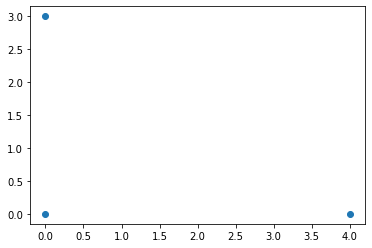

In [5]:
plt.scatter(point_cloud[: , 0], point_cloud[: , 1])

Star of the simplex - GUDHI
	 time: 0:00:00.000523
	 contributions list lenght:  3
	 simplicies found:           7
	 points in the ecc plot:     3

Extend cliques recursively - pure python
	 time: 0:00:00.000564
	 simplicies found:           7
	 points in the ecc plot:     4


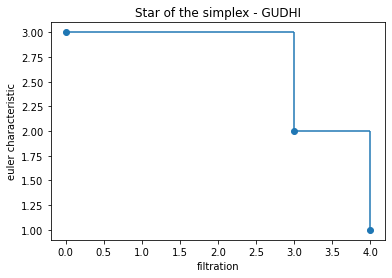

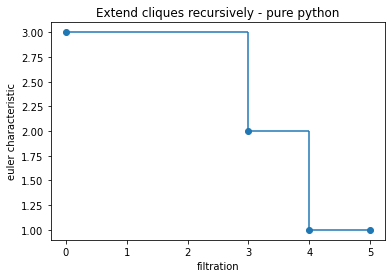

In [6]:
compare_methods(point_cloud, 10)

## Rhomboid

In [7]:
point_cloud = np.array([[4,0], [0,3.5], [-2, 0], [-0.5, -3]])

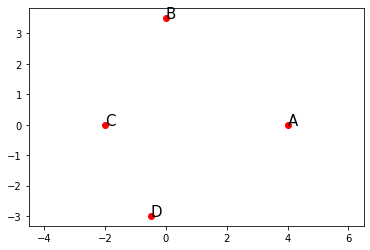

In [8]:
plt.axis('equal')
labels = ["A", "B", "C", "D"]
for i in range(len(point_cloud)):
    plt.scatter(point_cloud[i][0], point_cloud[i][1], color = "red")
    plt.text(point_cloud[i][0], point_cloud[i][1], labels[i], fontsize =15)


Star of the simplex - GUDHI
	 time: 0:00:00.002319
	 contributions list lenght:  6
	 simplicies found:           15
	 points in the ecc plot:     6

Extend cliques recursively - pure python
	 time: 0:00:00.000744
	 simplicies found:           15
	 points in the ecc plot:     7


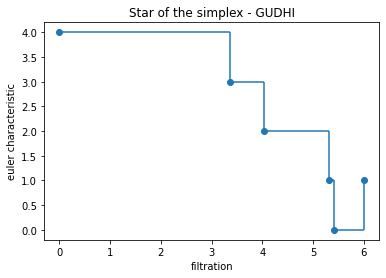

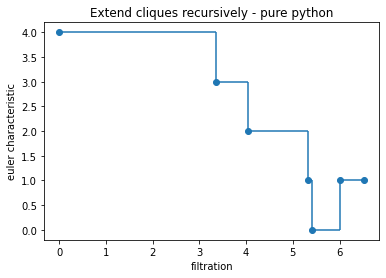

In [9]:
compare_methods(point_cloud, 10)

## Tetrahedron

In [10]:
point_cloud = np.array([[0,0,0], [0,1,0], [2,0,0], [0,0,3]])

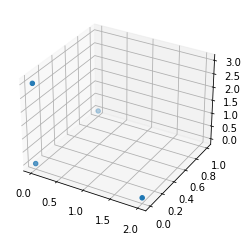

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[0] for x in point_cloud], [x[1] for x in point_cloud], [x[2] for x in point_cloud])

Star of the simplex - GUDHI
	 time: 0:00:00.001297
	 contributions list lenght:  4
	 simplicies found:           15
	 points in the ecc plot:     4

Extend cliques recursively - pure python
	 time: 0:00:00.000972
	 simplicies found:           15
	 points in the ecc plot:     7


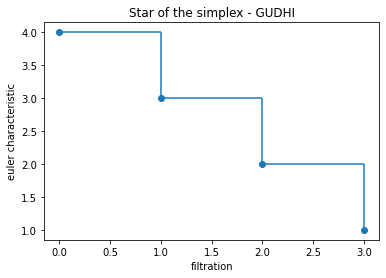

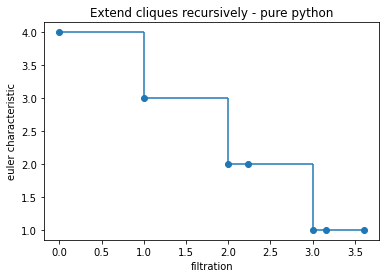

In [12]:
compare_methods(point_cloud, 10)

## Points from the example in the slides



In [13]:
point_cloud = np.array([[0,0], [2,-0.2], [4,0.2], [0,-1.5], [2,-3], [4,-1], [3.8,-2.5]] )

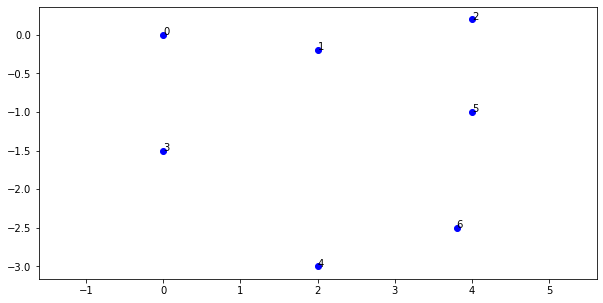

In [14]:
plt.figure(figsize=(10,5))
plt.axis('equal')
for i in range(len(point_cloud)):
    plt.scatter(point_cloud[i][0], point_cloud[i][1], color = "blue")
    plt.text(point_cloud[i][0], point_cloud[i][1], i)

Star of the simplex - GUDHI
	 time: 0:00:00.001947
	 contributions list lenght:  9
	 simplicies found:           127
	 points in the ecc plot:     9

Extend cliques recursively - pure python
	 time: 0:00:00.003156
	 simplicies found:           127
	 points in the ecc plot:     22


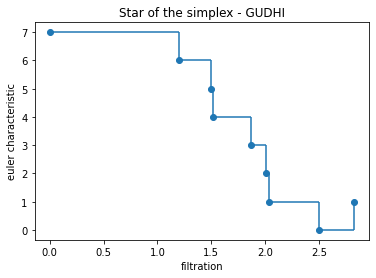

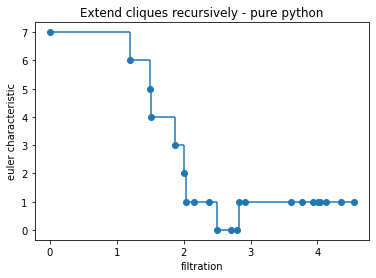

In [15]:
compare_methods(point_cloud, 10)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Circle

In [17]:
point_cloud = []

NUMBER_OF_POINTS = 100

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
point_cloud = np.array(point_cloud)

#np.savetxt('circle.csv', point_cloud, fmt='%f', delimiter=',')

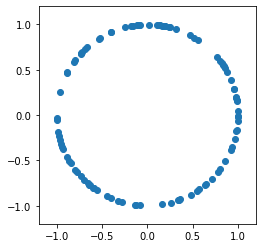

In [18]:
plt.axis('scaled')
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.scatter(point_cloud[:,0], point_cloud[:,1])

In [22]:
points = point_cloud
epsilon = 0.75
draw_lines = False

Star of the simplex - GUDHI
	 time: 0:00:32.168396
	 contributions list lenght:  101
	 simplicies found:           3328672
	 points in the ecc plot:     101

Extend cliques recursively - pure python
	 time: 0:00:40.468525
	 simplicies found:           3328672
	 points in the ecc plot:     1189


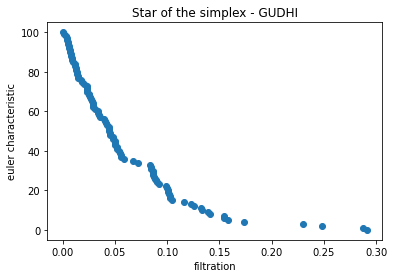

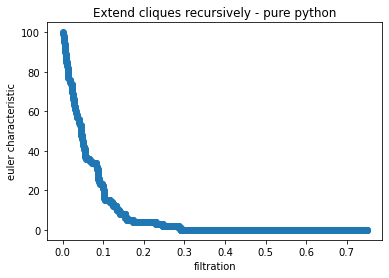

In [23]:
compare_methods(point_cloud, epsilon, draw_lines)

### we can use memory_profiler to monitor the RAM usage

In [27]:
%memit ecc_gudhi.compute_local_contributions(points, epsilon)

peak memory: 863.66 MiB, increment: 625.82 MiB


In [28]:
%memit ecc_recursive.compute_local_contributions(points, epsilon)

peak memory: 627.13 MiB, increment: 386.79 MiB


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Double circle

In [ ]:
point_cloud = []

NUMBER_OF_POINTS = 100

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([2*np.cos(angle), 5*np.sin(angle)])
    
    
#point_cloud = np.array(point_cloud)

In [ ]:
plt.axis('scaled')
plt.xlim((-2.2,2.2))
plt.ylim((-2.2,2.2))
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

In [ ]:
compare_methods(point_cloud, 1, draw_lines=False)

In [ ]:
%memit ecc.compute_local_contributions(point_cloud, 1)

In [ ]:
%memit ecc_extend_clique.ECC_recursive(point_cloud, 1)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# infinity

In [ ]:
point_cloud = tadasets.infty_sign(n=50, noise=None)

np.savetxt('infinity.csv', point_cloud, fmt='%f', delimiter=',')

In [ ]:
#plt.axis('scaled')
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])

In [ ]:
compare_methods(point_cloud, 1)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# n shpere

In [ ]:
point_cloud = tadasets.sphere(n=100, r=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2])

np.savetxt('sphere.csv', point_cloud, fmt='%f', delimiter=',')

In [ ]:
compare_methods(point_cloud, .5, draw_lines=False)

# torus

In [ ]:
point_cloud = tadasets.torus(n=100, c=2, a=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2])

np.savetxt('torus.csv', point_cloud, fmt='%f', delimiter=',')

## Hypercube

In [ ]:
# random points in the unit cube

N_POINTS = 100
DIMENSION = 3

np.random.seed(42)
point_cloud = np.random.rand(N_POINTS,DIMENSION)

In [ ]:
compare_methods(point_cloud, 0.6, draw_lines=False)

# GRID

In [ ]:
def create_grid(dim, lenght):
    # creates #dim arrays each of #lenght numbers at 0.1 distance
    # then staks them together

    return np.stack(np.meshgrid( *[[x/10 for x in range(lenght)] for i in range(dim)]  ), -1).reshape(-1, dim)

In [ ]:
point_cloud = create_grid(4, 5)

In [ ]:
compare_methods(point_cloud, 0.2)